<a href="https://colab.research.google.com/github/kooose38/create_model/blob/dev/XGBoost_Kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving train (3).csv to train (3).csv


{'train (3).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,

In [4]:
!pip install -q xgboost 

In [18]:
import pandas as pd 
import numpy as np 
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as  sns 
import matplotlib.pyplot as plt 
import matplotlib.style 
matplotlib.style.use('ggplot')

In [6]:
df = pd.read_csv('./Kaggle_titanic_train.csv', header=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_x = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
df_t = df[['Survived']]

In [10]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [11]:
df_x['Age'] = df_x['Age'].fillna(df_x['Age'].mean())
df_x['Embarked'] = df_x['Embarked'].fillna(df_x['Embarked'].mode()[0])
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [12]:
name = ['Sex','Embarked']

for i in name:
  la = LabelEncoder()
  df_x[i] = la.fit_transform(df_x[i])
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [14]:
name = ['Age','Fare']

for i in name:
  scaler = StandardScaler()
  df_x[i] = scaler.fit_transform(df_x[i].values.reshape(-1,1)).ravel()
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,2
1,1,0,0.638789,1,0,0.786845,0
2,3,0,-0.284663,0,0,-0.488854,2
3,1,0,0.407926,1,0,0.420730,2
4,3,1,0.407926,0,0,-0.486337,2
...,...,...,...,...,...,...,...
886,2,1,-0.207709,0,0,-0.386671,2
887,1,0,-0.823344,0,0,-0.044381,2
888,3,0,0.000000,1,2,-0.176263,2
889,1,1,-0.284663,0,0,-0.044381,0


In [16]:
x = df_x.values
t = df_t.values.ravel()
x.shape, t.shape

((891, 7), (891,))

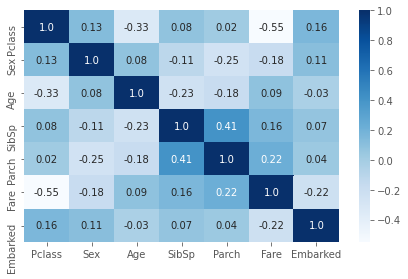

In [21]:
sns.heatmap(df_x.corr().round(2), cmap='Blues', fmt='', annot=True)
plt.tight_layout()

### 主成分分析

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

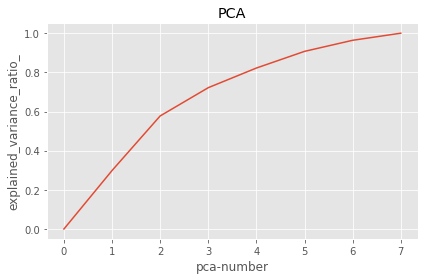

In [27]:
pca = PCA()

x_pca = pca.fit_transform(x)
#寄与率
ratio = pca.explained_variance_ratio_.cumsum()
ratio = np.concatenate([np.array([0]), ratio])

plt.plot(ratio)
plt.ylabel('explained_variance_ratio_')
plt.xlabel('pca-number')
plt.title('PCA')
plt.tight_layout()

第一主成分から第四主成分までの特長量で[ 80% ]()のデータを説明できる  
**次元削減できる。**

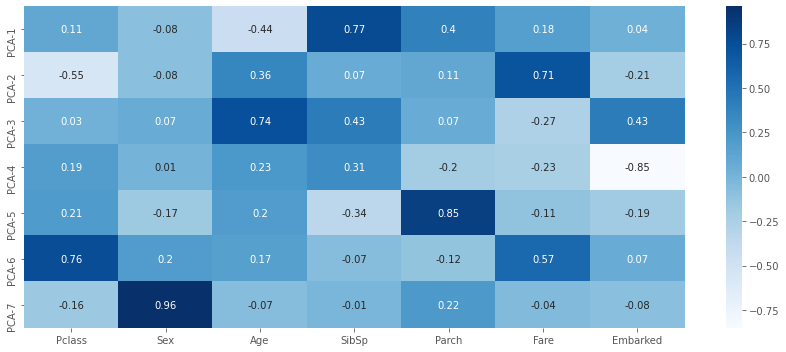

In [33]:
label=[]
for i in range(7):
  label.append('PCA-{}'.format(i+1))

df_pca = pd.DataFrame(pca.components_, index=label, columns=df_x.columns)

plt.figure(figsize=(12,5))
sns.heatmap(df_pca.round(2), cmap='Blues', annot=True, fmt='')
plt.tight_layout()

- 第一主成分には[SibSpが高く]()、[Ageが低い]()データ集合からなる
- 第二主成分には[Fareが高く]()、[Pclassが低い]()データ集合からなる  

下図は二つの主成分の関係性  
> 若干、NOT_survivedは第二主成分が高いほど正の相関がある。  
**第一主成分と第二主成分のみでは全体のデータの60%なので完全とは言えないので参考**



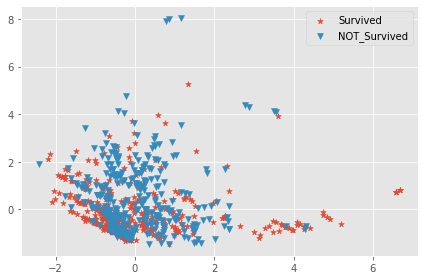

In [34]:
plt.scatter(x_pca[:,0][t==0], x_pca[:,1][t==0], label='Survived', marker='*')
plt.scatter(x_pca[:,0][t==1], x_pca[:,1][t==1], label='NOT_Survived', marker='v')
plt.legend()
plt.tight_layout()

### アンサンブル学習のブースティング

split data to  train, vaildation, test 

In [35]:
x_train1, x_test, t_train1, t_test = train_test_split(x, t, random_state=0)

x_train2, x_val, t_train2, t_val = train_test_split(x_train1, t_train1, random_state=0)

Create model  
set parameters

In [42]:
param = {
    'silent':1, #Waning表示しない
    'max_depth':6,
    'eta':1e-1,
    'eval_metric':'auc', #正解率
    'objective':'binary:logistic' #確率で返す
}
#データ型の変換
dtrain = xgb.DMatrix(x_train2, t_train2)
dtest = xgb.DMatrix(x_val, t_val)
#num_boost_round==決定木モデルの数
model = xgb.train(params=param, dtrain=dtrain, num_boost_round=100, early_stopping_rounds=10, evals=[(dtest, 'test')])

[0]	test-auc:0.821649
Will train until test-auc hasn't improved in 10 rounds.
[1]	test-auc:0.822975
[2]	test-auc:0.859131
[3]	test-auc:0.832401
[4]	test-auc:0.834315
[5]	test-auc:0.835493
[6]	test-auc:0.839028
[7]	test-auc:0.837997
[8]	test-auc:0.833873
[9]	test-auc:0.841384
[10]	test-auc:0.845582
[11]	test-auc:0.846686
[12]	test-auc:0.852283
Stopping. Best iteration:
[2]	test-auc:0.859131



prediction


In [43]:
#確率で帰るので注意
pred = model.predict(xgb.DMatrix(x_test))

def calc(x):
    if x >= 0.5:
        return 1
    else:
        return 0

predi = []

for i in pred:
    predi.append(calc(i))
pred = np.array(predi)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [44]:
confusion_matrix(t_test, pred)

array([[122,  17],
       [ 18,  66]])